In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

import seaborn as sns
#sns.set_style('whitegrid')

In [2]:
# 통계 세팅

import scipy as sp
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("과제_걸그룹.csv", header=None)
df.columns = ['name', 'height']

In [38]:
df_searching = df.set_index('height')
search_dict = df_searching.to_dict()['name']
search_dict[163.8] = '포미닛, 쥬얼리'

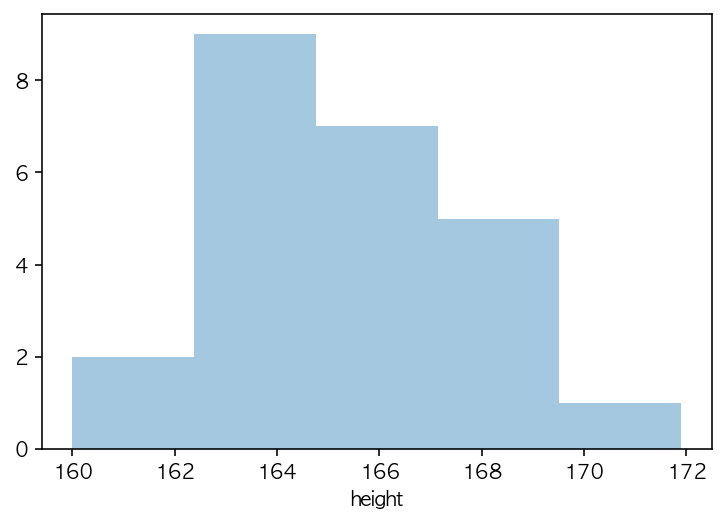

In [4]:
ax = sns.distplot(df['height'], kde=False, bins=5)

In [38]:
df['height'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()

[160.0, 163.67499999999998, 165.1, 167.1, 171.9]

In [52]:
def bin_list(data_list, bin_size):
    data_max = data_list.max()
    data_min = data_list.min()
    bin_amount = (data_list.max() - data_list.min()) / bin_size
    result_list = [data_min]  # 초기화
    append_amount = data_min  # 초기화

    for _ in range(bin_size):
        append_amount = append_amount + bin_amount
        result_list.append(append_amount)
    # 여기서 result_list 는 나옴
    print("bin 구간 소속 데이터 :", result_list)
    
    
    
    bin_dict = dict()  # 초기화
    for bin_point in result_list:
        bin_dict_list = []
        for data in data_list.tolist():
            if bin_point <= data < bin_point + bin_amount:
                bin_dict_list.append(data)
            else:
                pass
        bin_dict_list.sort()
        print("================")
        print(f"{bin_point} 구간 소속 데이터는?", bin_dict_list)
        print(f"{bin_point} 구간의 상대도수는? :", len(bin_dict_list) / len(data_list))
        for temp_height in bin_dict_list:
            print("구간 소속 걸그룹 명 :", search_dict[temp_height], f"({temp_height})")
        
        bin_dict[f'{bin_point}'] = len(bin_dict_list)
    
    # 후처리 작업 (bin_point 끝과 데이터 1분위가 안 맞는 상황 대처)
    removing_key = list(bin_dict.keys())[-2]
    bin_dict.pop(f'{removing_key}', None)
    return result_list


bin 구간 소속 데이터 : [160.0, 162.38, 164.76, 167.14, 169.51999999999998, 171.89999999999998]
160.0 구간 소속 데이터는? [160.0, 160.8]
160.0 구간의 상대도수는? : 0.08333333333333333
구간 소속 걸그룹 명 : 브아걸 (160.0)
구간 소속 걸그룹 명 : 시크릿 (160.8)
162.38 구간 소속 데이터는? [162.5, 162.6, 163.5, 163.6, 163.7, 163.8, 163.8, 164.1, 164.2]
162.38 구간의 상대도수는? : 0.375
구간 소속 걸그룹 명 : 2NE1 (162.5)
구간 소속 걸그룹 명 : 카라 (162.6)
구간 소속 걸그룹 명 : 소녀시대 (163.5)
구간 소속 걸그룹 명 : 원더걸스 (163.6)
구간 소속 걸그룹 명 : 피기돌스 (163.7)
구간 소속 걸그룹 명 : 포미닛, 쥬얼리 (163.8)
구간 소속 걸그룹 명 : 포미닛, 쥬얼리 (163.8)
구간 소속 걸그룹 명 : 티아라 (164.1)
구간 소속 걸그룹 명 : 미스에이 (164.2)
164.76 구간 소속 데이터는? [165.0, 165.2, 165.4, 165.8, 166.0, 166.8, 167.0]
164.76 구간의 상대도수는? : 0.2916666666666667
구간 소속 걸그룹 명 : 다비치 (165.0)
구간 소속 걸그룹 명 : 파이브돌스 (165.2)
구간 소속 걸그룹 명 : 에이핑크 (165.4)
구간 소속 걸그룹 명 : 걸스데이 (165.8)
구간 소속 걸그룹 명 : 씨스타 (166.0)
구간 소속 걸그룹 명 : f(x) (166.8)
구간 소속 걸그룹 명 : 쇼콜라 (167.0)
167.14 구간 소속 데이터는? [167.4, 167.5, 168.5, 168.8, 169.3]
167.14 구간의 상대도수는? : 0.20833333333333334
구간 소속 걸그룹 명 : 스피카 (167.4)
구간 소속 걸그룹 명 : 천

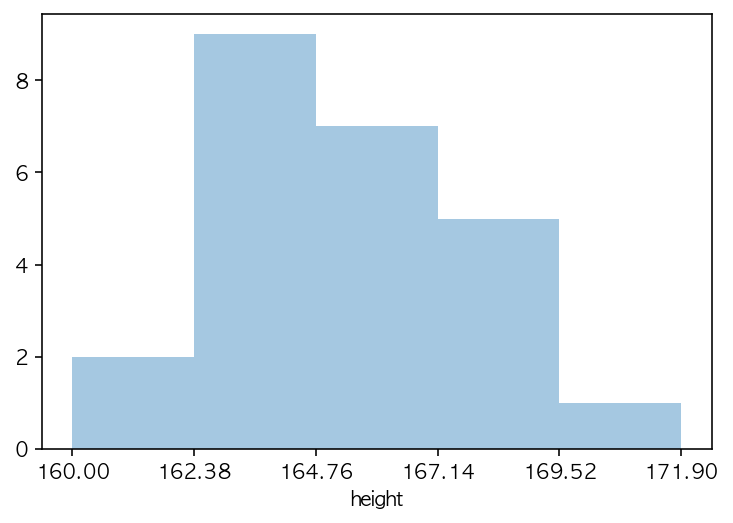

In [53]:
ax = sns.distplot(df['height'], kde=False, bins=5)
plt.xticks(bin_list(data_list = df['height'], bin_size = 5));

bin 구간 데이터 : [160.0, 161.7, 163.39999999999998, 165.09999999999997, 166.79999999999995, 168.49999999999994, 170.19999999999993, 171.89999999999992]
[160.0, 160.8]
상대도수는? : 0.08333333333333333
[162.5, 162.6]
상대도수는? : 0.08333333333333333
[163.5, 163.6, 163.7, 163.8, 163.8, 164.1, 164.2, 165.0]
상대도수는? : 0.3333333333333333
[165.2, 165.4, 165.8, 166.0]
상대도수는? : 0.16666666666666666
[166.8, 167.0, 167.4, 167.5]
상대도수는? : 0.16666666666666666
[168.5, 168.8, 169.3]
상대도수는? : 0.125
[]
상대도수는? : 0.0
[171.9]
상대도수는? : 0.041666666666666664
도수분포표 dict로 확인 : {'160.0': 2, '161.7': 2, '163.39999999999998': 8, '165.09999999999997': 4, '166.79999999999995': 4, '168.49999999999994': 3, '171.89999999999992': 1}


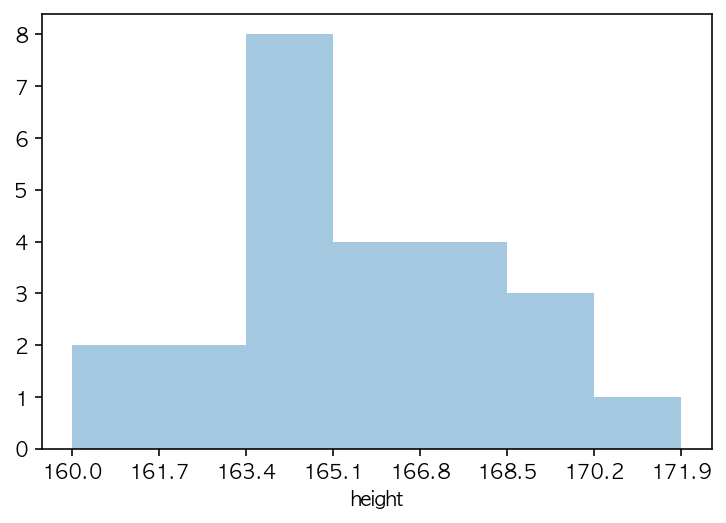

In [17]:
ax = sns.distplot(df['height'], kde=False, bins=7)
plt.xticks(bin_list(data_list = df['height'], bin_size = 7));

bin 구간 데이터 : [160.0, 163.96666666666667, 167.93333333333334, 171.9]
[160.0, 160.8, 162.5, 162.6, 163.5, 163.6, 163.7, 163.8, 163.8]
상대도수는? : 0.375
[164.1, 164.2, 165.0, 165.2, 165.4, 165.8, 166.0, 166.8, 167.0, 167.4, 167.5]
상대도수는? : 0.4583333333333333
[168.5, 168.8, 169.3]
상대도수는? : 0.125
[171.9]
상대도수는? : 0.041666666666666664
도수분포표 dict로 확인 : {'160.0': 9, '163.96666666666667': 11, '171.9': 1}


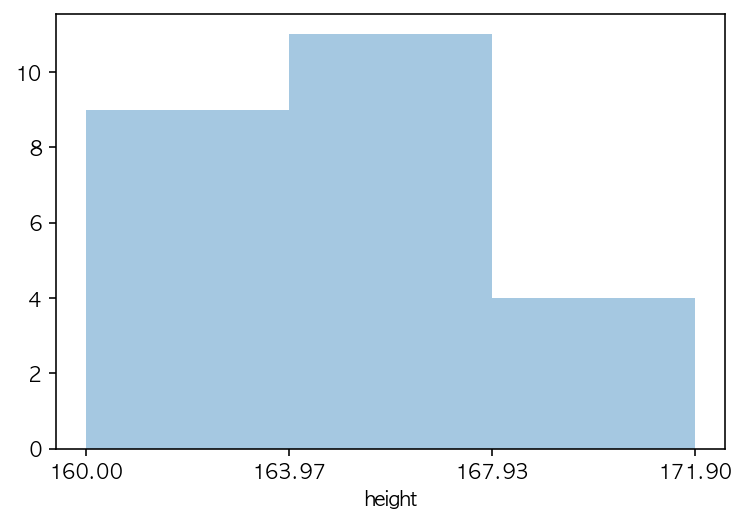

In [18]:
ax = sns.distplot(df['height'], kde=False, bins=3)
plt.xticks(bin_list(data_list = df['height'], bin_size = 3));

bin 구간 데이터 : [160.0, 161.32222222222222, 162.64444444444445, 163.96666666666667, 165.2888888888889, 166.61111111111111, 167.93333333333334, 169.25555555555556, 170.57777777777778, 171.9]
[160.0, 160.8]
상대도수는? : 0.08333333333333333
[162.5, 162.6]
상대도수는? : 0.08333333333333333
[163.5, 163.6, 163.7, 163.8, 163.8]
상대도수는? : 0.20833333333333334
[164.1, 164.2, 165.0, 165.2]
상대도수는? : 0.16666666666666666
[165.4, 165.8, 166.0]
상대도수는? : 0.125
[166.8, 167.0, 167.4, 167.5]
상대도수는? : 0.16666666666666666
[168.5, 168.8]
상대도수는? : 0.08333333333333333
[169.3]
상대도수는? : 0.041666666666666664
[]
상대도수는? : 0.0
[171.9]
상대도수는? : 0.041666666666666664
도수분포표 dict로 확인 : {'160.0': 2, '161.32222222222222': 2, '162.64444444444445': 5, '163.96666666666667': 4, '165.2888888888889': 3, '166.61111111111111': 4, '167.93333333333334': 2, '169.25555555555556': 1, '171.9': 1}


([<matplotlib.axis.XTick at 0x123464e10>,
 <a list of 10 Text xticklabel objects>)

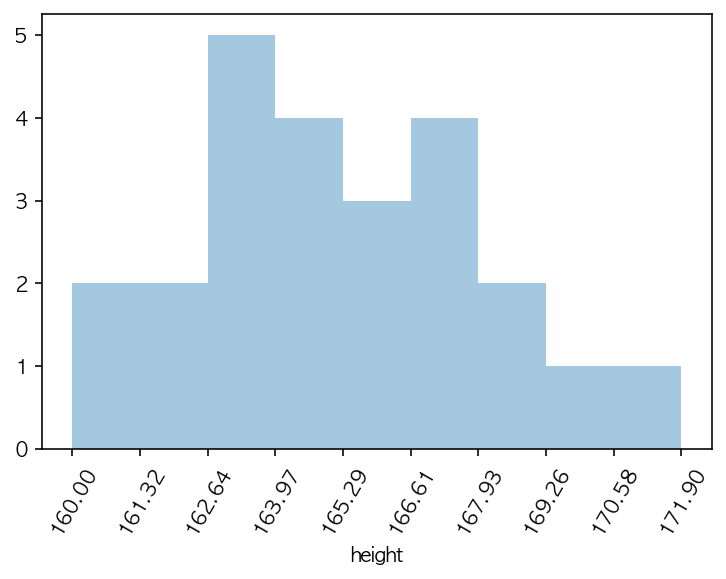

In [21]:
ax = sns.distplot(df['height'], kde=False, bins=9)
plt.xticks(bin_list(data_list = df['height'], bin_size = 9), rotation=60)
